In [84]:
# Kütüphaneleri import edelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [85]:
# Şimdi ise datamızı import edelim.
# 60.000 train için ve 10.000 test için elimizde veri var.
# Toplam 10 farklı giyecek sınıfı var ve bunları NN(neural network) kullanarak sınıflandıracağız.
# Datayı daha detaylı görmek için -> https://github.com/zalandoresearch/fashion-mnist

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


In [86]:
# Örnek olarak bir veriye bakalım ve sonra görselleştirelim.
print("Örnek training verisinin shape'i :", train_images[0].shape)
print("Örnek training verisinin :", train_images[0])
print("Örnek verinin label'ı :", train_labels[0])

Örnek training verisinin shape'i : (28, 28)
Örnek training verisinin : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 17

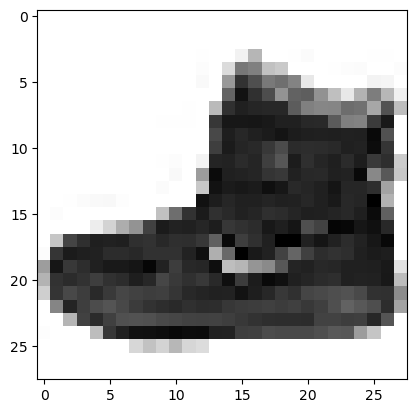

In [87]:
# Şimdi ise daha iyi anlamak için görselleştirelim.
# Bunun için matplotlib'in imshow (image show) methodunu kullanacağız.
plt.imshow(train_images[0], cmap=plt.cm.binary)

In [88]:
# Bilgisayarlar resimden anlamadığı için resmin tamamının her bir pixel'i sayılara çevrilmiştir.
# Veri'de her bir pixel ne kadar siyah olduğuna göre konulmuştur. 0 -> beyaz, 255 -> siyah
# Yapay sinir ağlarını 0 ve 1 arasındaki sayılarla beslemek çoğu zaman daha doğru bir yöntemdir. 
# O yüzden normalizasyon uygulayalım.
# Veri setindeki her bir veriyi 255 ile böldüğümüz zaman maximum değer 1 ve minimum değer 0 olur.
train_images = train_images / 255.0
test_images = test_images / 255.0
# Labellar rakamlardan oluşuyor ve her bir rakamın neyi gösterdiğini anlamak için bir liste oluşturalım.
# Datayı daha detaylı görmek için -> https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

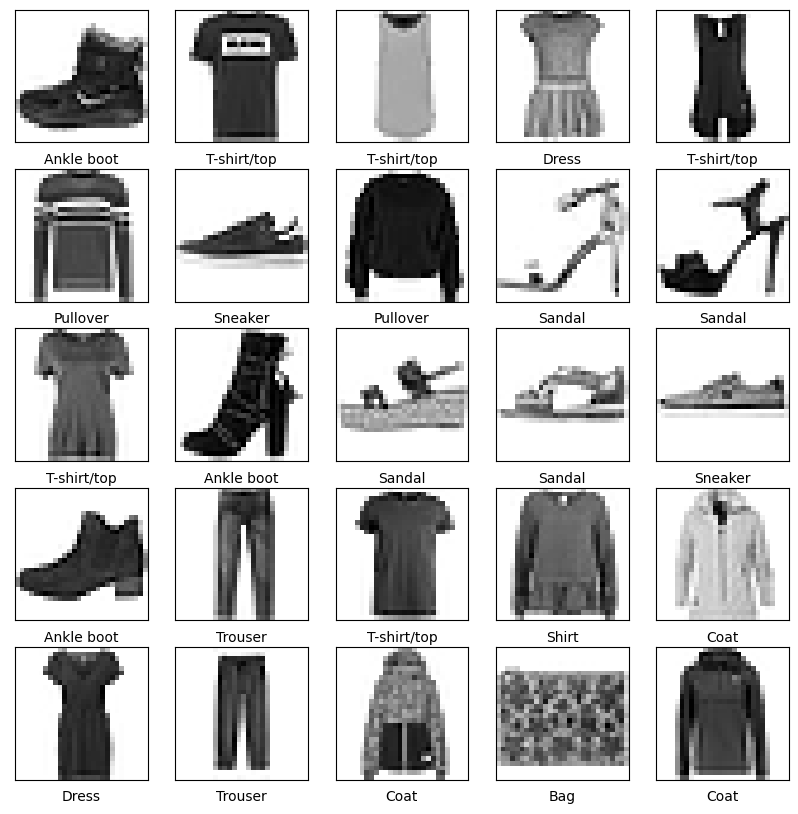

In [89]:
# Şimdi ise veri setini daha da iyi anlamak için 25 tane örnek veriye bakalım.

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])    
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[(train_labels[i])])

In [90]:
# Şimdi ise modelimizi oluşturalım.
# Bu bir multilabel classification olduğu için son katmanda aktivasyon fonksiyonu olarak softmax'ı kullanacağız.
# Ayrıca loss fonksiyonu olarak SparseCategoricalCrossentropy kullanacağız, bunun için verilerimizin (28,28) yerine
# düzleştirilmiş halde olması gerekiyor yani hepsinin tek bir satıra indirgenmiş şekilde olması gerekiyor. 
# Bunun için Flatten fonksiyonunu kullanacağız
# Eğerki loss function olarak CategoricalCrossentropy kullanılmak istenirse labelların one-hot encoded şeklinde olması gerekiyor

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])


history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5724 - accuracy: 0.8063 - val_loss: 0.4687 - val_accuracy: 0.8343
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4237 - accuracy: 0.8513 - val_loss: 0.4314 - val_accuracy: 0.8472
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3889 - accuracy: 0.8629 - val_loss: 0.4256 - val_accuracy: 0.8475
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3673 - accuracy: 0.8696 - val_loss: 0.4147 - val_accuracy: 0.8494
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3513 - accuracy: 0.8747 - val_loss: 0.4139 - val_accuracy: 0.8513
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3392 - accuracy: 0.8776 - val_loss: 0.3811 - val_accuracy: 0.8629
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3298 - accuracy: 0.8794 - val_loss: 0.3791 - val_accuracy:

In [91]:
# Şimdi ise test datasında modelimize prediction yaptıralım, ilk başta dönen sonuçlar olasılıksal olarak dönecek
# ondan sonra bu sonuçları one-hot encoded şekline çevireceğiz. (en yüksek ihtimalli label 1 diğerleri 0 olacak)
y_probs = model.predict(test_images)
y_probs

313/313 [==============================] - 0s 892us/step


array([[1.24219650e-05, 9.10792886e-10, 8.07871814e-08, ...,
        2.60158647e-02, 8.26348900e-04, 9.63605702e-01],
       [1.60624575e-06, 1.08602615e-11, 9.96580184e-01, ...,
        1.78945729e-16, 2.75719202e-07, 1.14912886e-14],
       [3.69910867e-06, 9.99995232e-01, 3.95445348e-08, ...,
        3.25501580e-16, 3.95901942e-08, 5.51198143e-10],
       ...,
       [1.09764177e-03, 5.47832997e-08, 1.84475983e-04, ...,
        1.41188593e-06, 9.98093188e-01, 2.29031087e-07],
       [5.00975648e-06, 9.99780953e-01, 5.28232476e-07, ...,
        6.18979220e-14, 1.28695194e-06, 2.36129495e-06],
       [1.12563306e-04, 1.48122490e-06, 4.58220806e-04, ...,
        6.51509985e-02, 9.61313210e-03, 2.03722529e-03]], dtype=float32)

In [92]:
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [93]:
# İşlemi daha iyi anlamak açısından örnek olarak ilk elemanı göstermek gerekirse
print(y_probs[0])
print(y_preds[0])

[1.2421965e-05 9.1079289e-10 8.0787181e-08 2.1313673e-07 4.4923968e-07
 9.5377220e-03 1.1797214e-06 2.6015865e-02 8.2634890e-04 9.6360570e-01]
9


In [94]:
# Şimdi ise basit confusion matrix ile modelin değerlendirilmesine bakalım
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[813,   4,  35,  37,   7,   2,  86,   0,  16,   0],
       [  0, 971,   3,  19,   5,   0,   1,   0,   1,   0],
       [ 11,   0, 837,  16,  93,   0,  38,   0,   5,   0],
       [ 22,  13,  19, 880,  43,   1,  15,   0,   7,   0],
       [  0,   0, 140,  24, 794,   0,  32,   0,  10,   0],
       [  0,   0,   0,   0,   0, 952,   0,  18,   2,  28],
       [127,   1, 142,  37,  96,   0, 575,   0,  22,   0],
       [  0,   0,   0,   0,   0,  25,   0, 889,   0,  86],
       [  1,   0,   6,   4,   5,   3,   2,   5, 974,   0],
       [  0,   0,   0,   0,   0,   8,   1,  11,   1, 979]], dtype=int64)

In [95]:
# Acaba modelin nerelerde kafası karışıyor ? Daha iyi anlamak açısından confusion matrix'i görselleştirelim.
# Öncelikle fonksiyon olarak yazıp sonra kullanalım.
import itertools
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

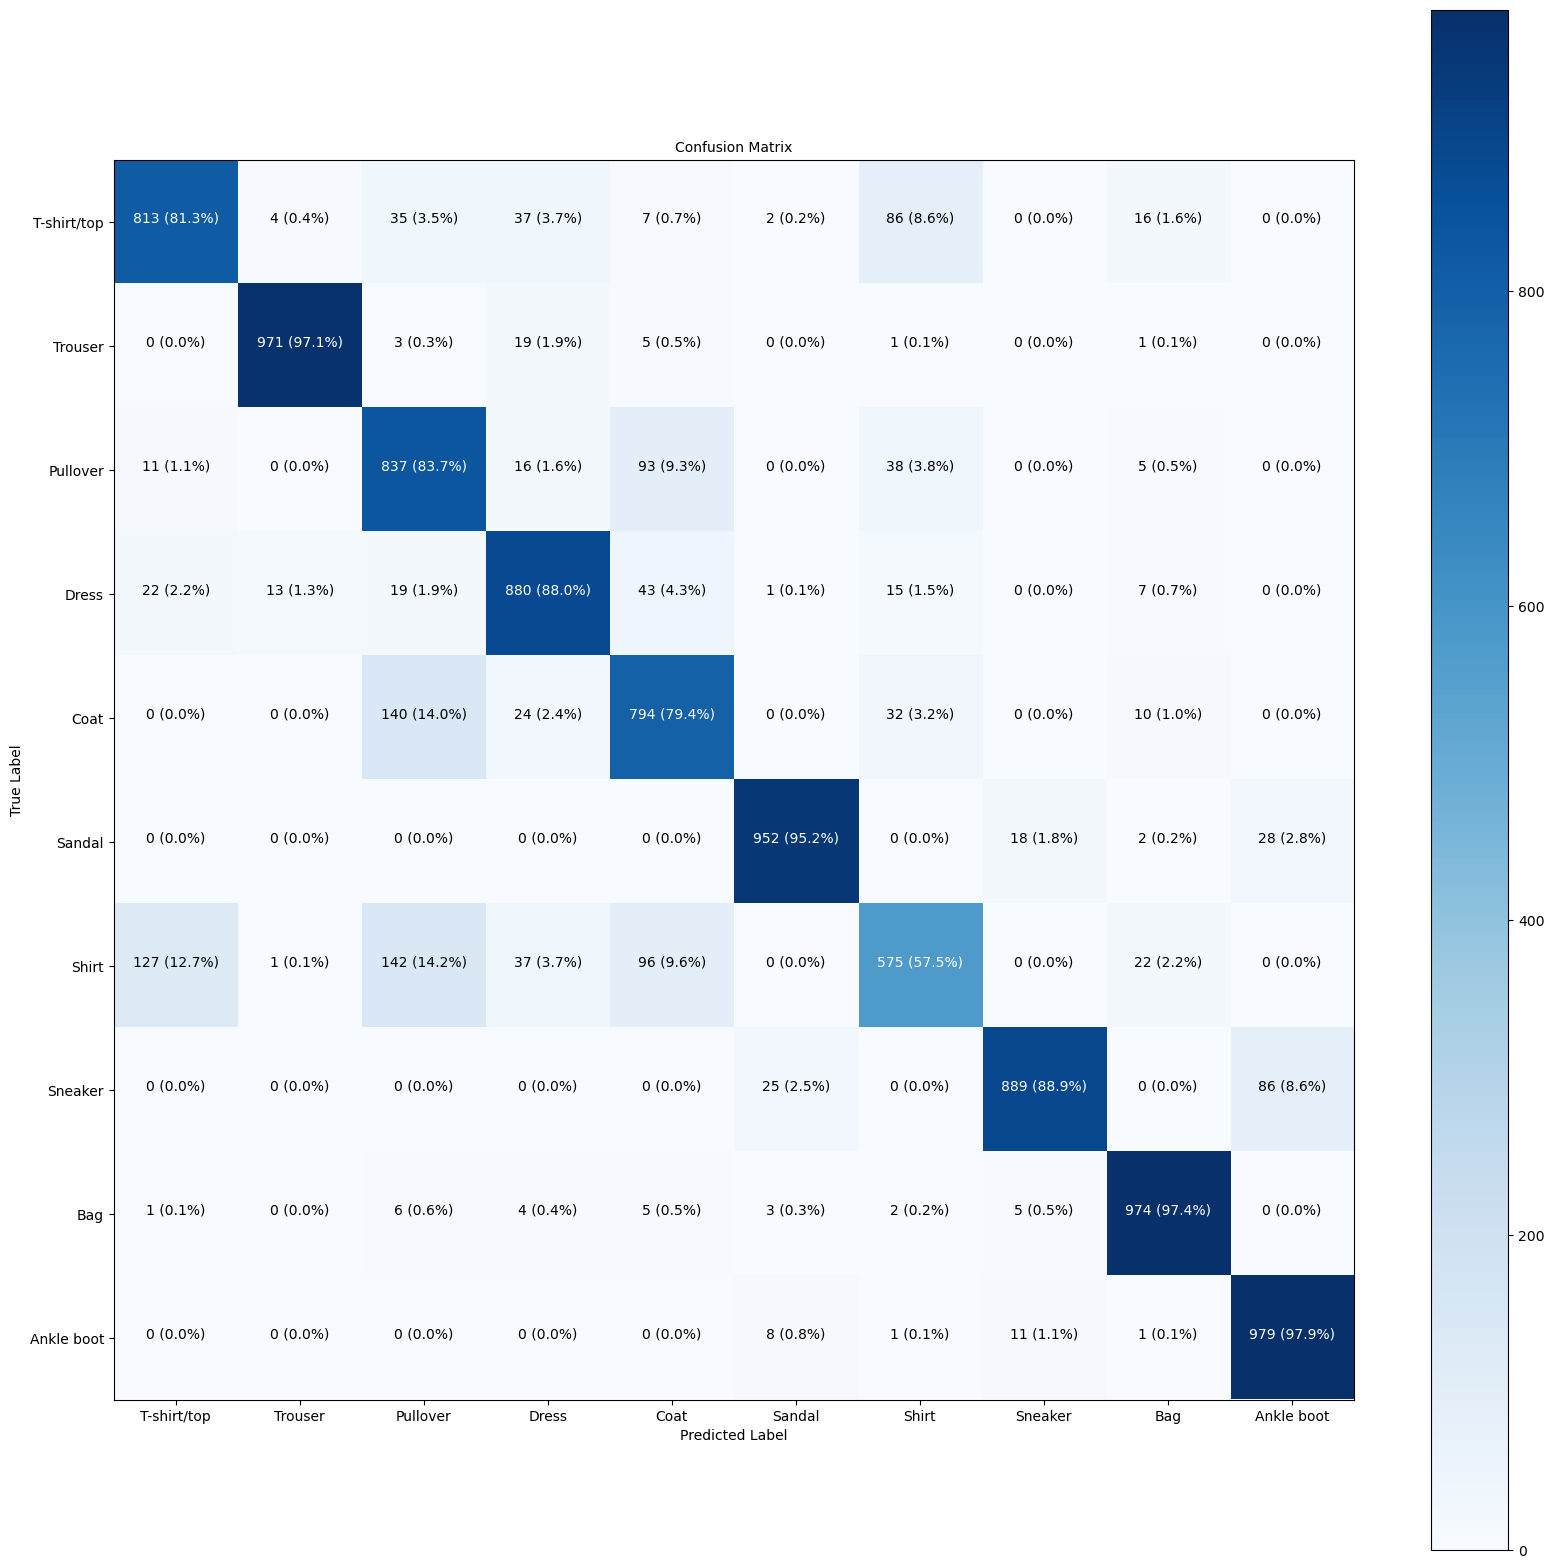

In [96]:
make_confusion_matrix(test_labels, y_preds, classes=class_names, figsize=(20,20), text_size=10)

In [97]:
# Benzer olan cisimlerde modelimizin kafası karışıyor.